### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mrmr import mrmr_regression
from sklearn.preprocessing import MinMaxScaler






### Data Analysis and Features selection

In [2]:
patient_147 = pd.read_csv('Patient 147_data.csv')

In [3]:
patient_147.describe()

,hm_mode0,hm_mode1,hm_mode2,hm_mode3,hm_mode4,hc_mode0,hc_mode1,hc_mode2,hc_mode3,hc_mode4,...,Disp_mode1,Disp_mode2,Disp_mode3,Disp_mode4,dispm_mode0,dispm_mode1,dispm_mode2,dispm_mode3,dispm_mode4,BIS
count,22475.000000,22475.000000,22475.000000,22475.000000,22475.000000,22475.000000,22475.000000,22475.000000,22475.000000,22475.000000,...,22475.000000,22475.000000,22475.000000,22475.000000,22475.000000,22475.000000,22475.000000,22475.000000,22475.000000,22475.000000
mean,0.063961,0.524833,1.403997,1.655390,1.732974,4.356184,1.105749,1.022502,1.062204,1.095309,...,1.935796,2.034316,1.946818,2.038534,1.019890,1.973177,1.982148,2.015956,2.008825,45.940529
std,0.021389,0.028739,0.025454,0.078943,0.124432,1.996084,0.021353,0.007088,0.027695,0.053107,...,0.017767,0.016027,0.061659,0.034840,0.063117,0.017873,0.006565,0.016554,0.032693,10.892395
min,0.010463,0.425603,1.310041,1.533892,1.394890,1.738643,1.056659,0.933961,1.001053,0.999468,...,1.807811,1.957528,1.653687,1.816397,0.341093,1.925117,1.958198,1.941873,1.876257,8.000000
25%,0.049381,0.508969,1.389469,1.606980,1.664877,3.554027,1.093176,1.021407,1.056395,1.072770,...,1.928018,2.024165,1.941273,2.033842,0.976649,1.962861,1.978105,2.009404,1.990816,41.100000
50%,0.058461,0.516114,1.395577,1.629574,1.757555,4.025548,1.100839,1.024347,1.070676,1.089460,...,1.936647,2.035292,1.961370,2.047782,1.016255,1.969797,1.982448,2.019052,2.008333,43.500000
75%,0.070673,0.525535,1.402311,1.661230,1.790153,4.520938,1.110516,1.026990,1.081309,1.127397,...,1.945310,2.045525,1.977724,2.058537,1.059496,1.976839,1.986597,2.027640,2.034407,46.500000
max,0.142630,0.655825,1.474266,1.939476,1.981628,26.528176,1.317104,1.037327,1.109966,1.240723,...,2.044749,2.079245,2.029060,2.076082,1.229015,2.053088,2.002308,2.044512,2.067491,97.000000


In [4]:
X=patient_147.drop('BIS', axis=1)
y= patient_147['BIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear regression

In [5]:
metrics = {}
def plot_regression(data, column):
    
    global metrics
    
    X = data[column].values.reshape(-1, 1)
    #X = X[:, np.newaxis]
    y = data['BIS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform regression
    reg = LinearRegression(n_jobs=-1).fit(X_train_scaled, y_train)
    
    # Predictions
    y_predicted = reg.predict(X_test_scaled)
    
    # Show the score and r2
    #mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    # keep track of metrics
    
    #metrics["{}_mse".format(column)] = mse
    metrics["{}_r2".format(column)] = r2
    
    
    
    # Plot the graph#
    plt.figure(figsize=(8,6))
    plt.scatter(data[column], data['BIS'], label="data", c="blue")
    plt.plot(X_test, y_predicted, label="Regression", c="red")
    plt.xlabel(column)
    plt.ylabel('BIS')
    plt.legend(loc="upper left")
    plt.show()

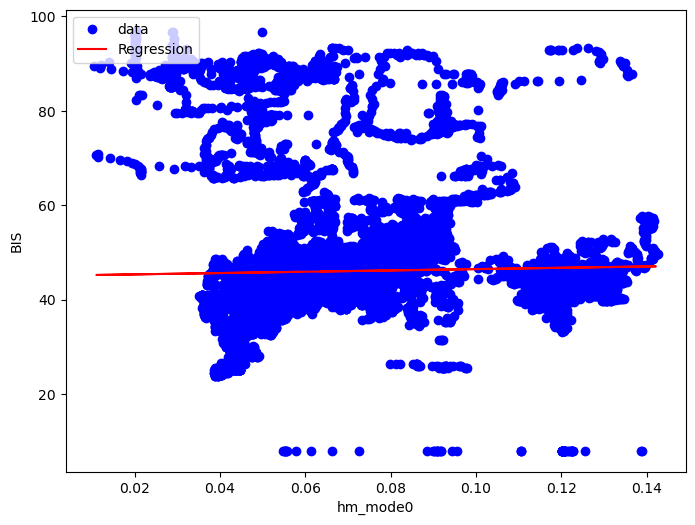

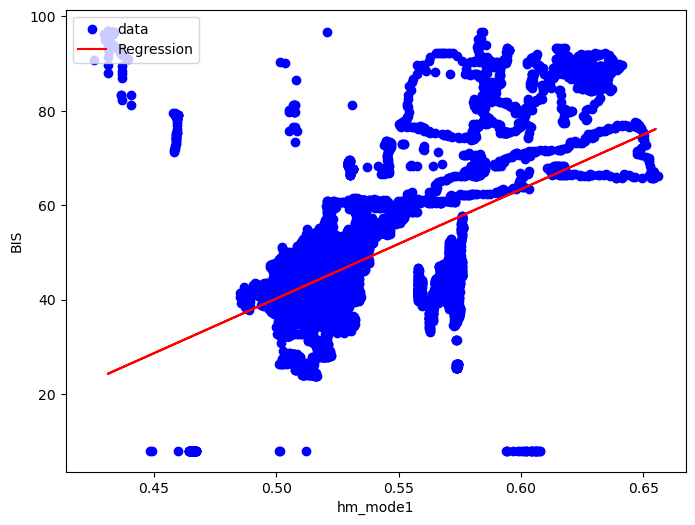

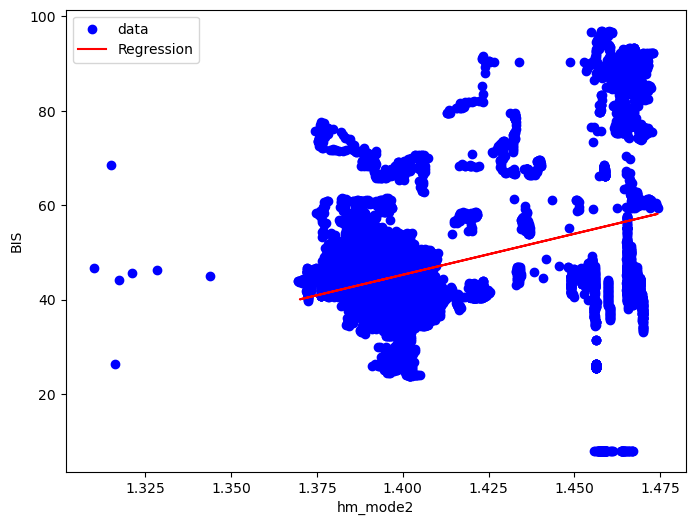

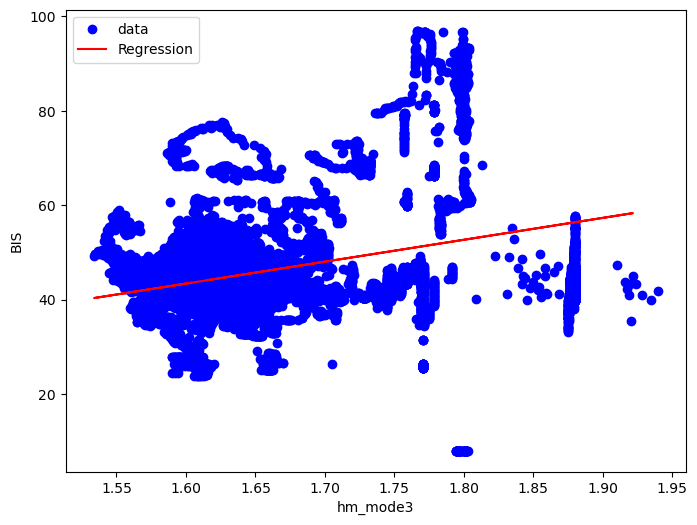

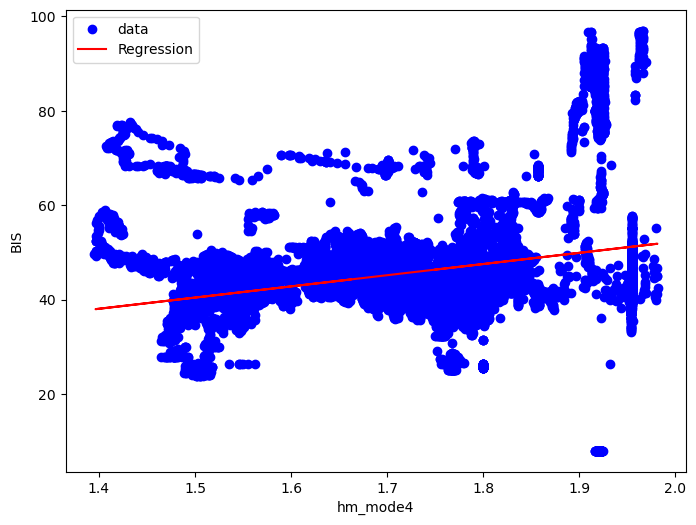

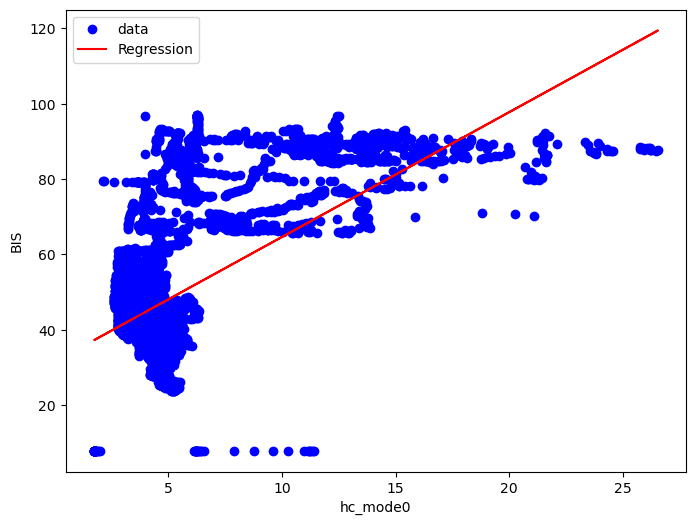

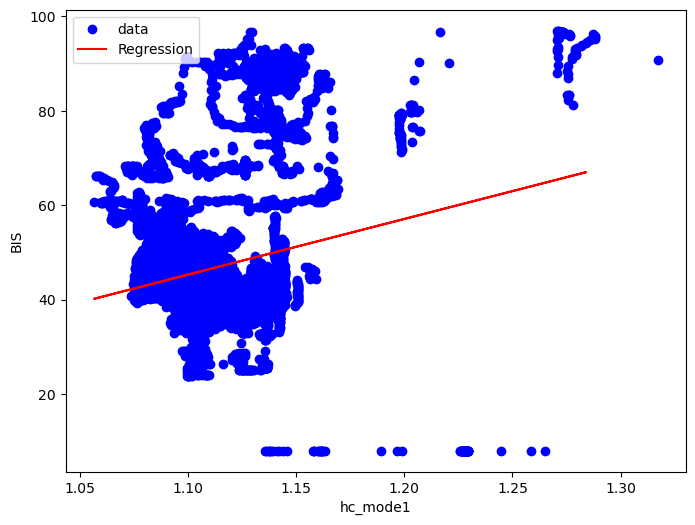

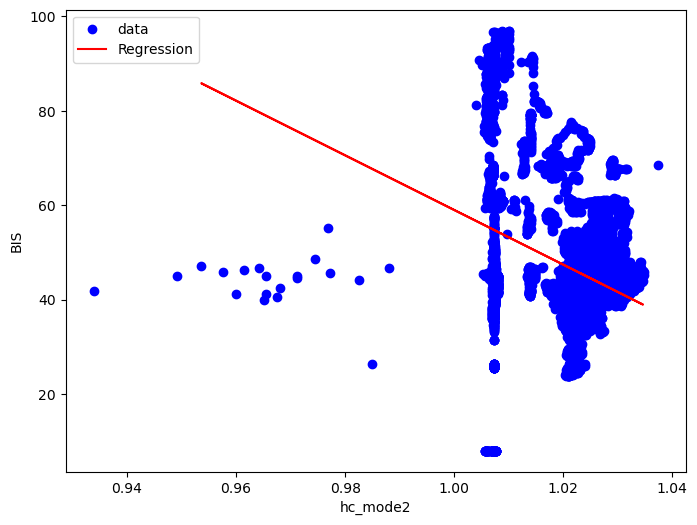

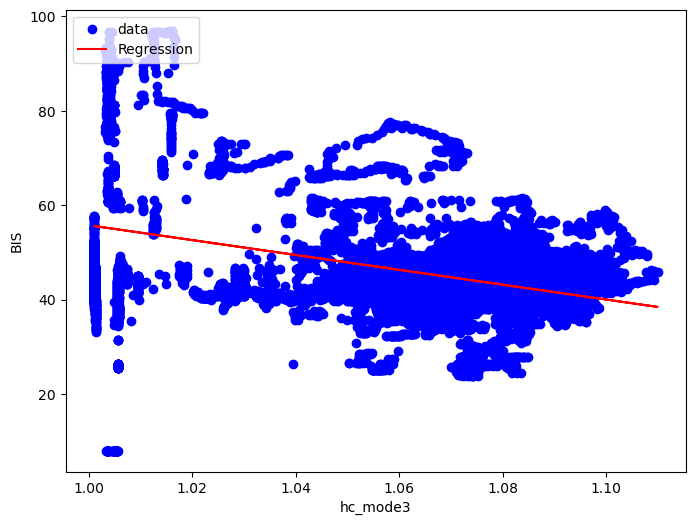

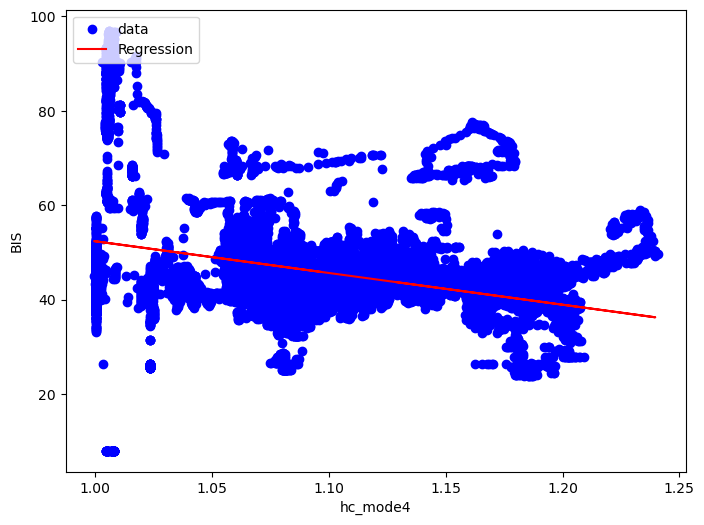

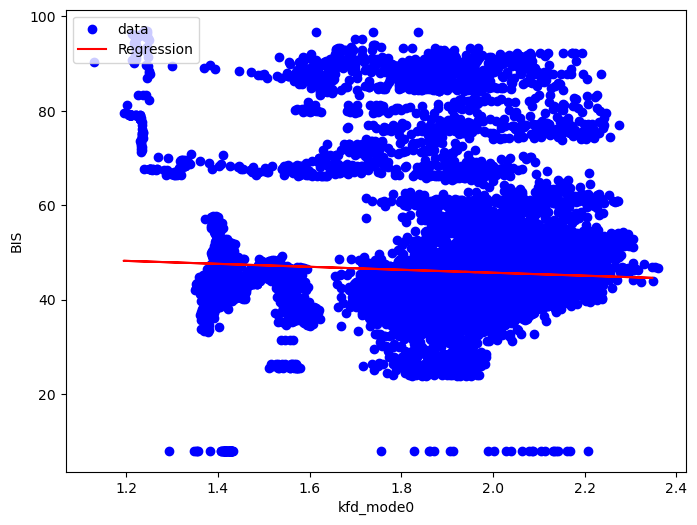

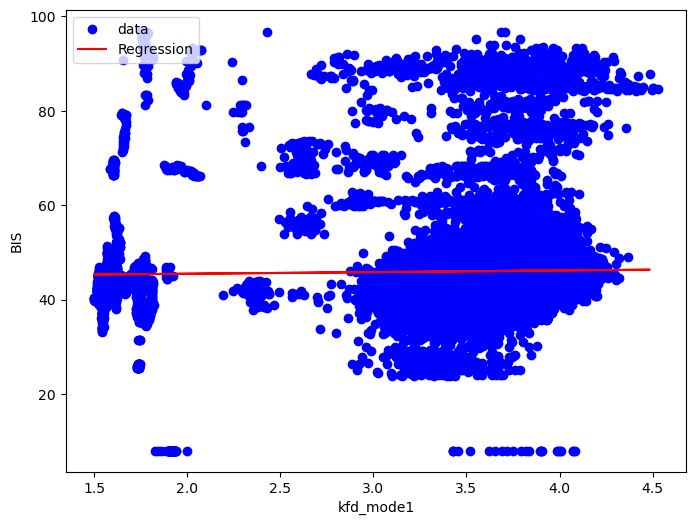

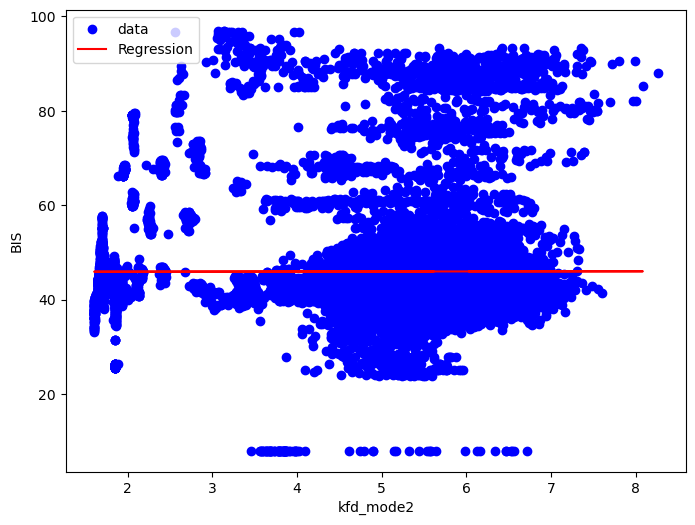

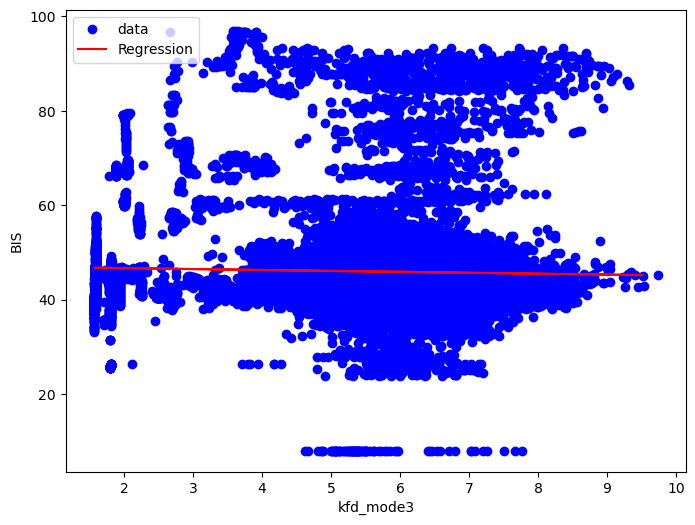

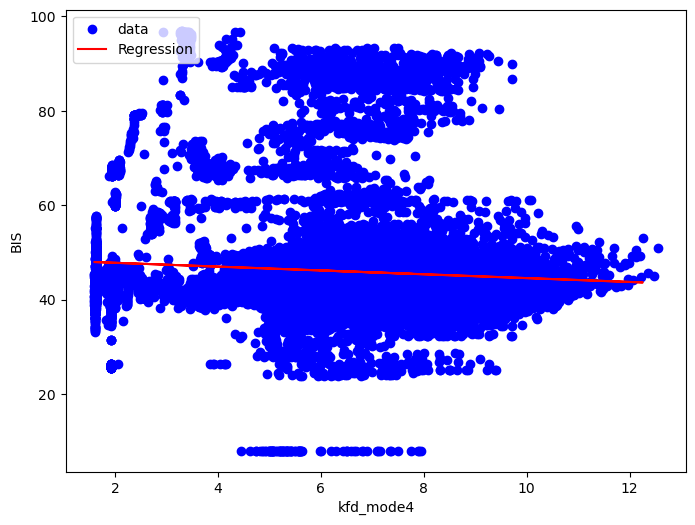

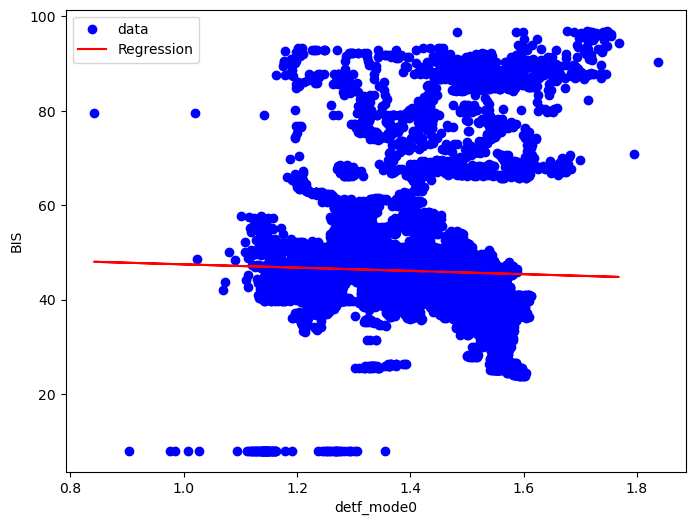

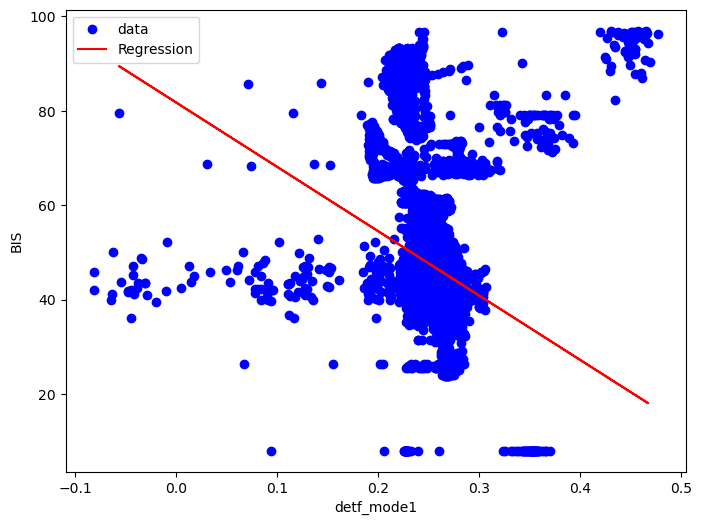

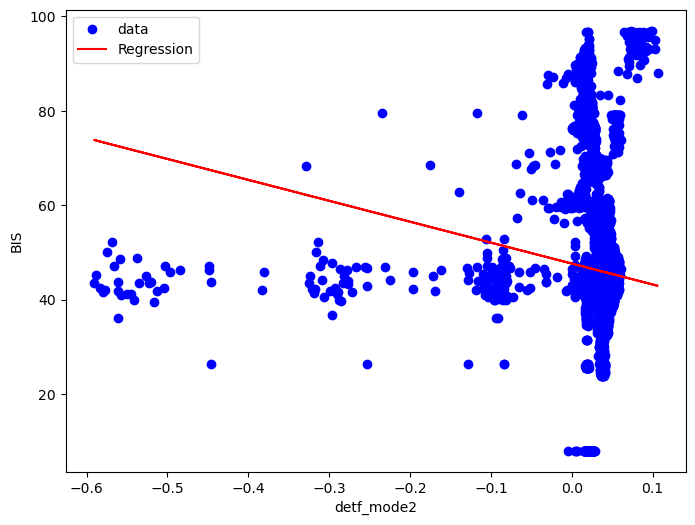

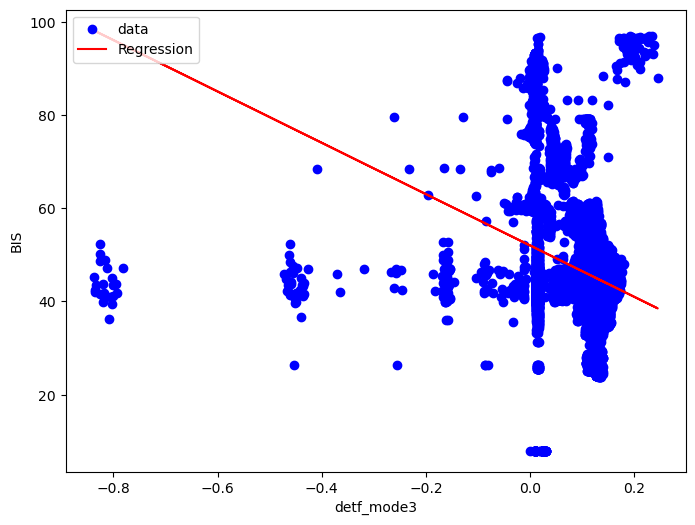

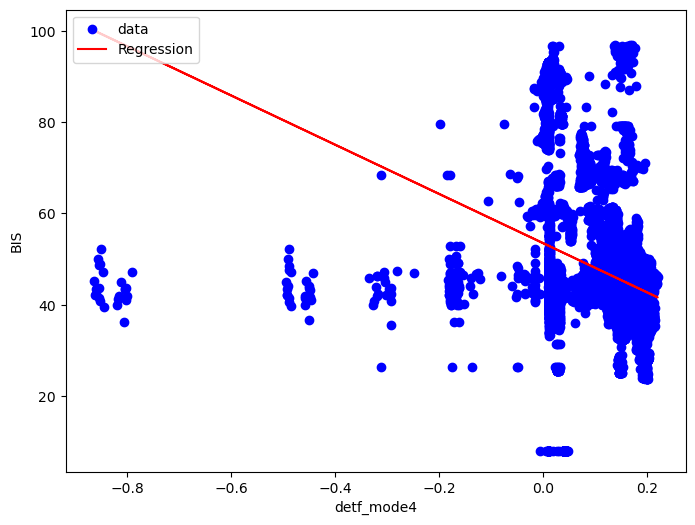

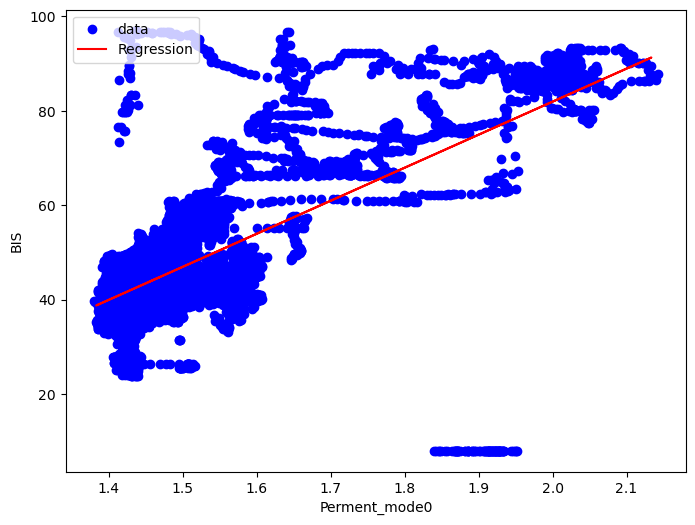

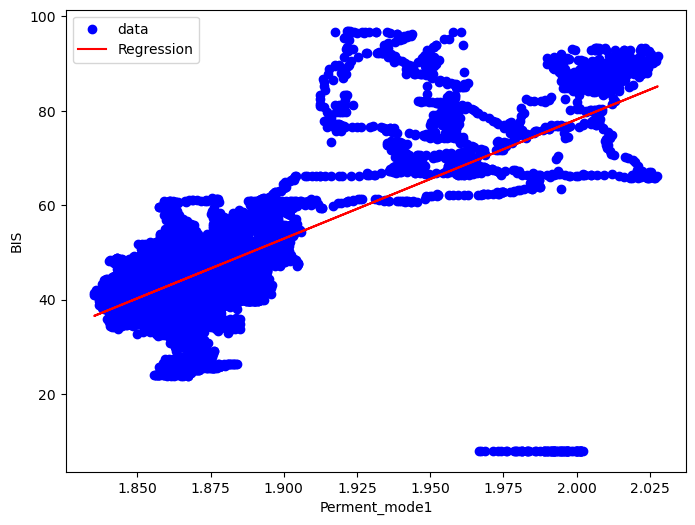

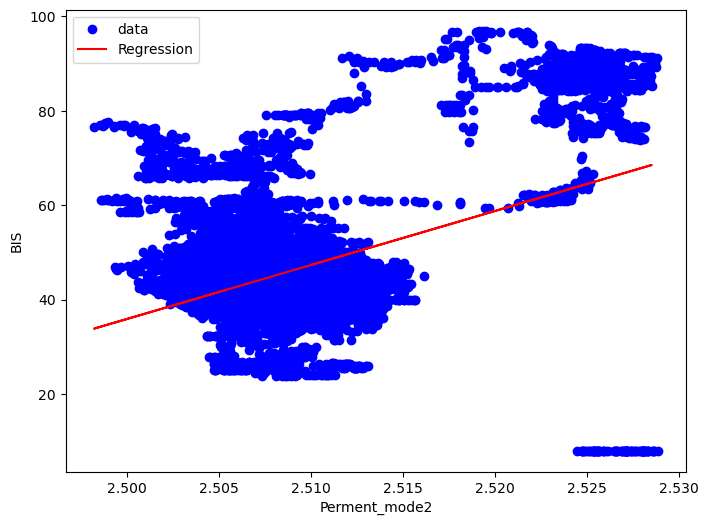

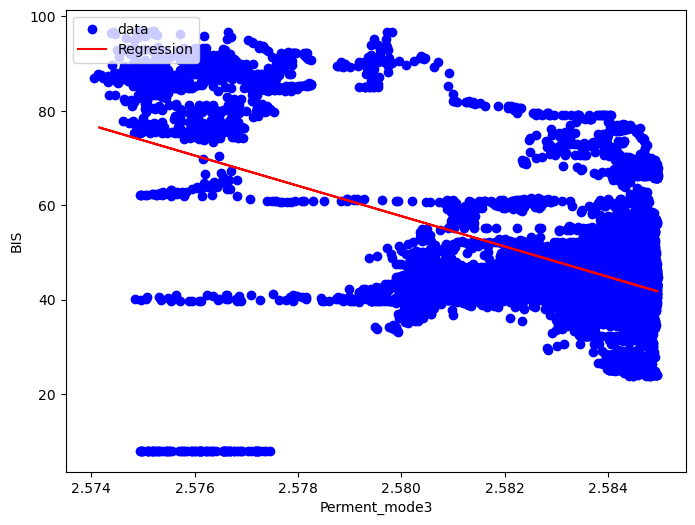

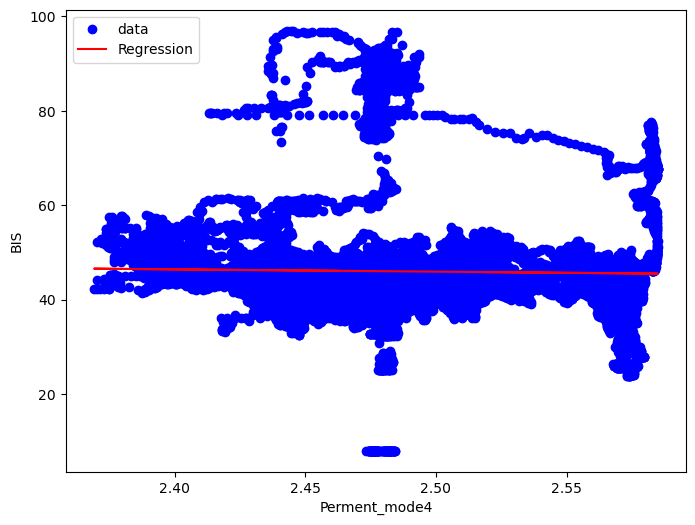

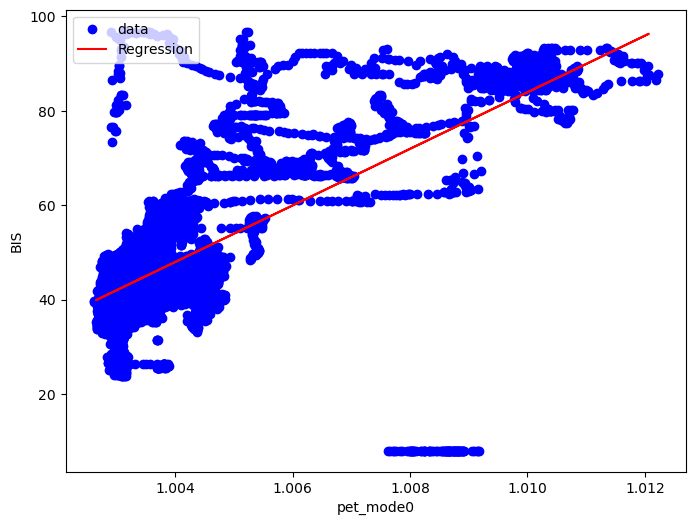

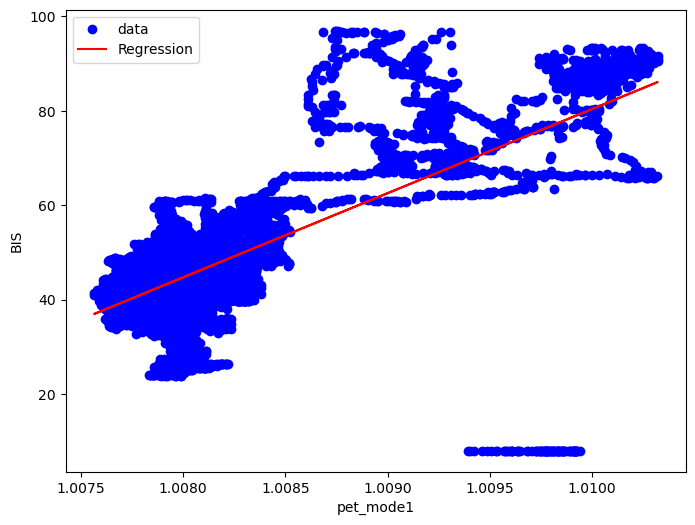

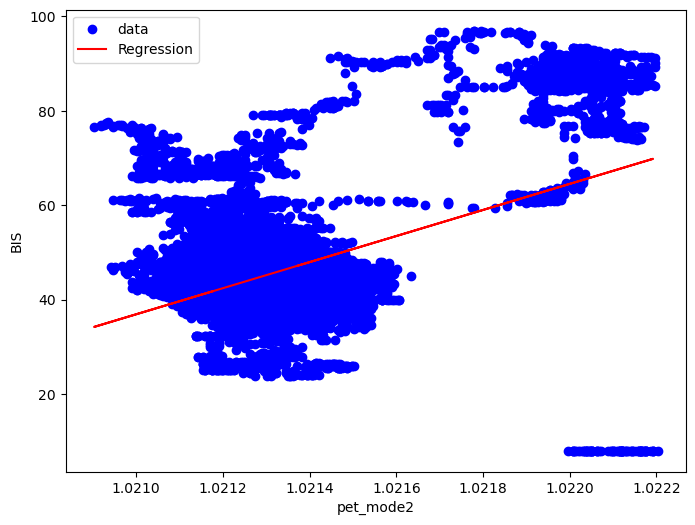

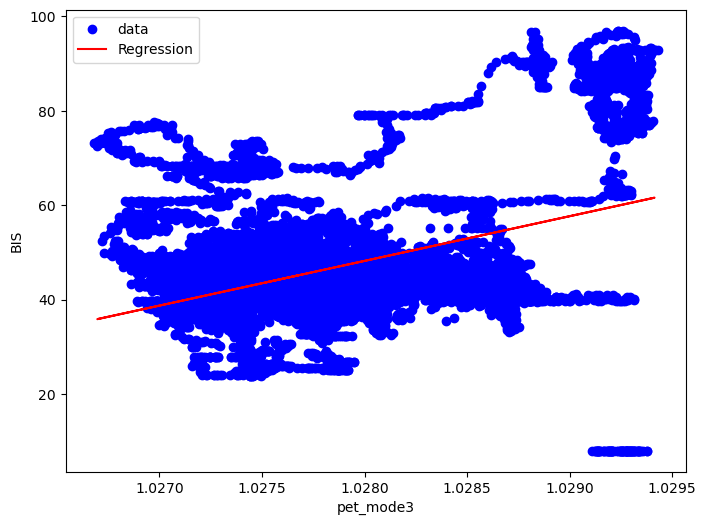

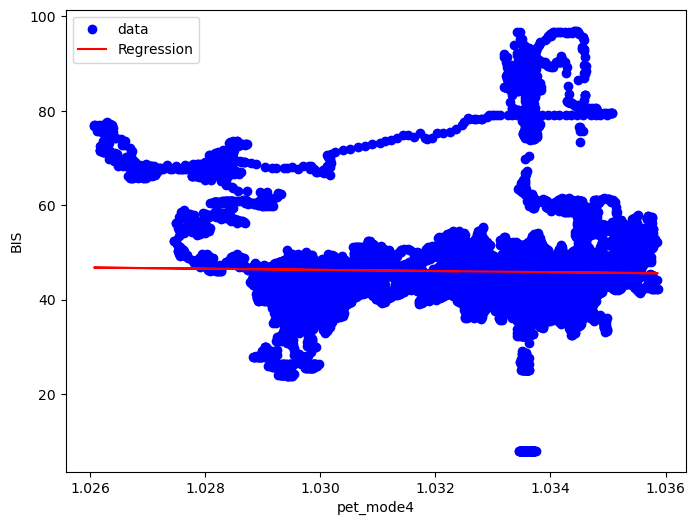

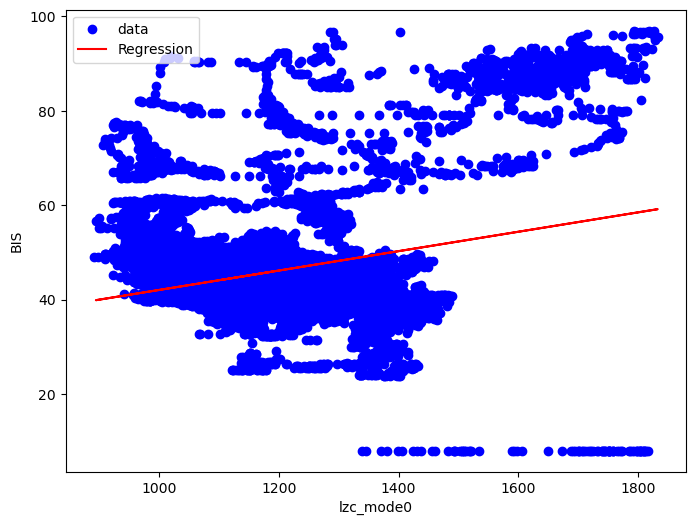

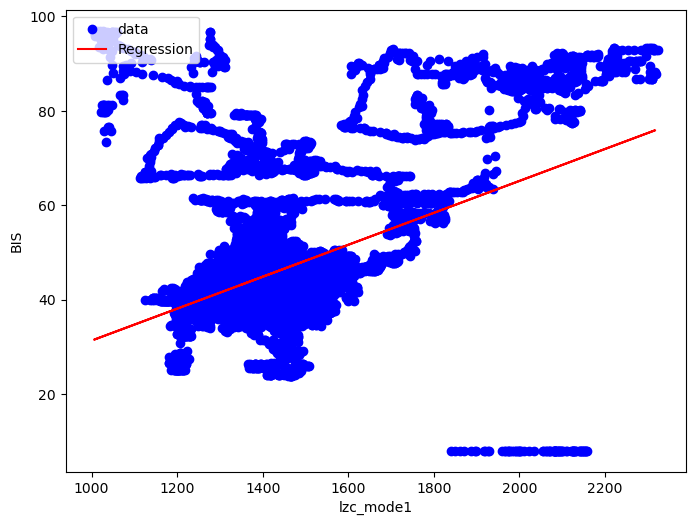

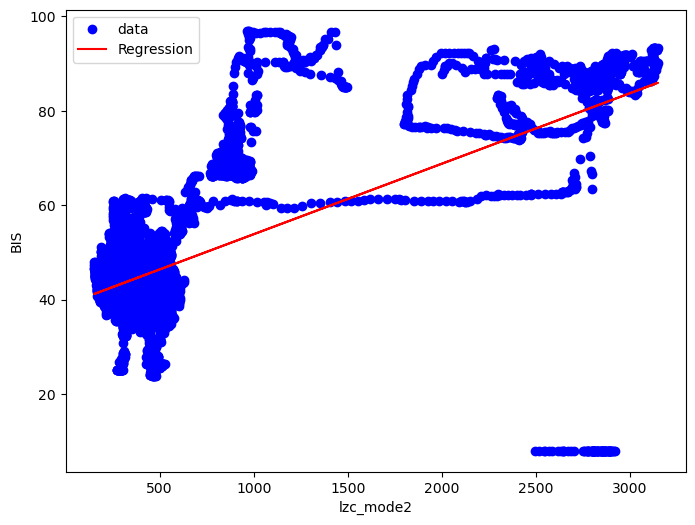

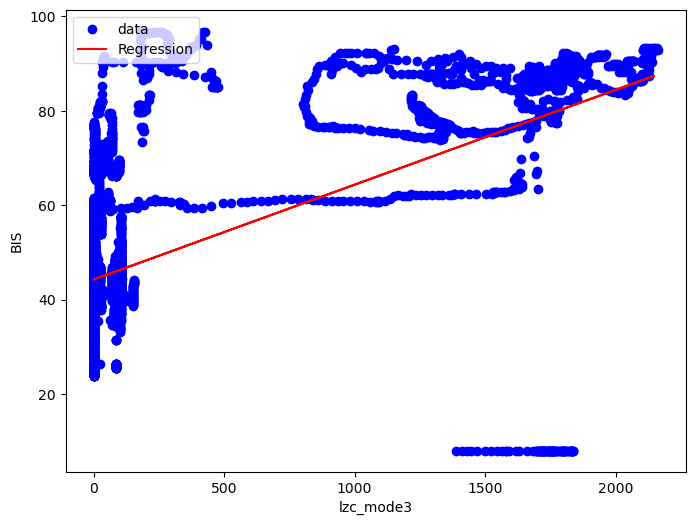

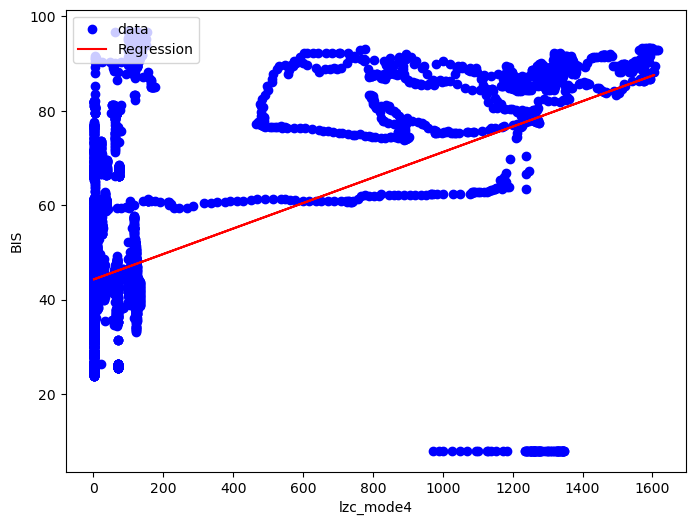

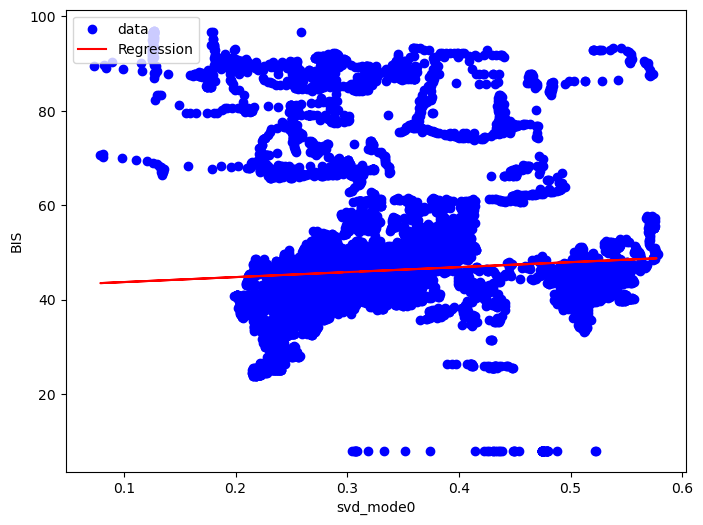

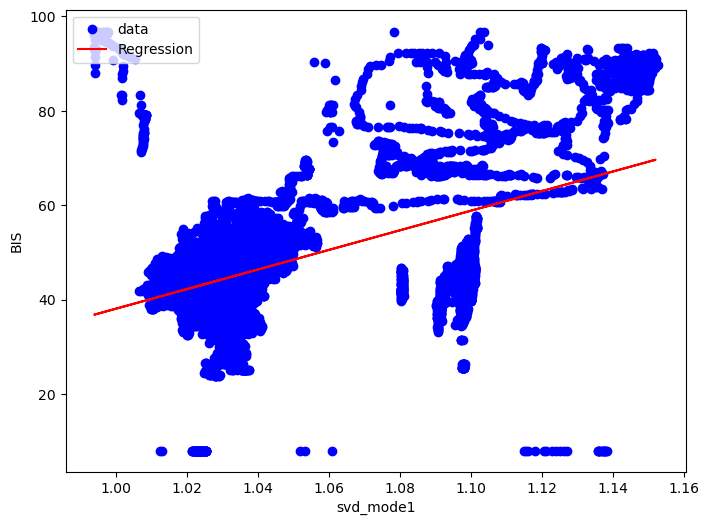

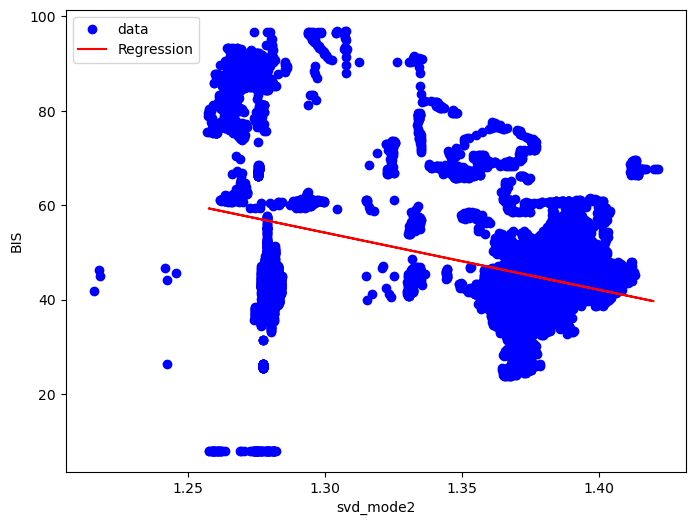

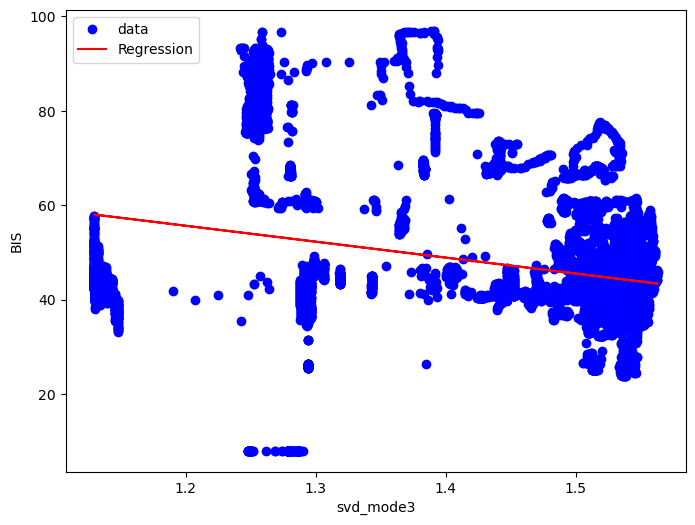

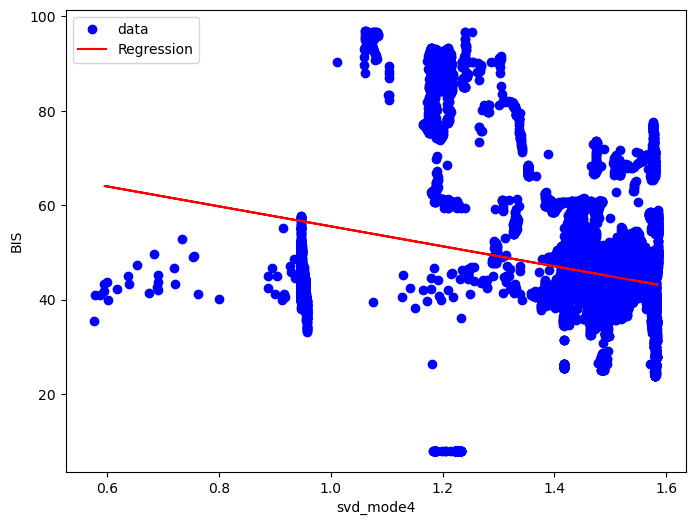

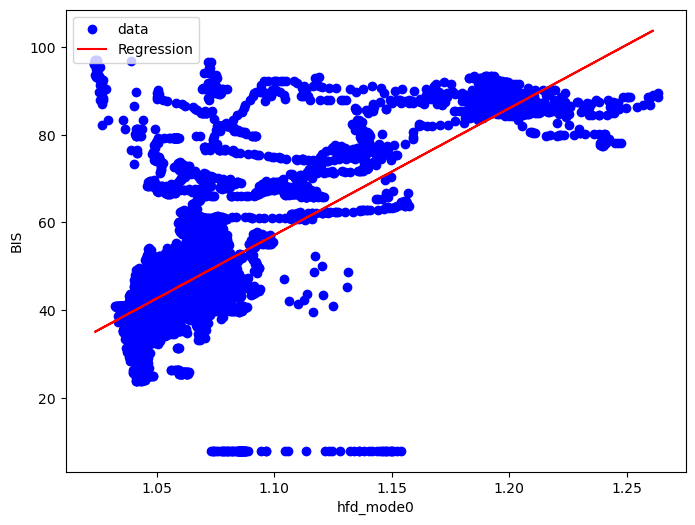

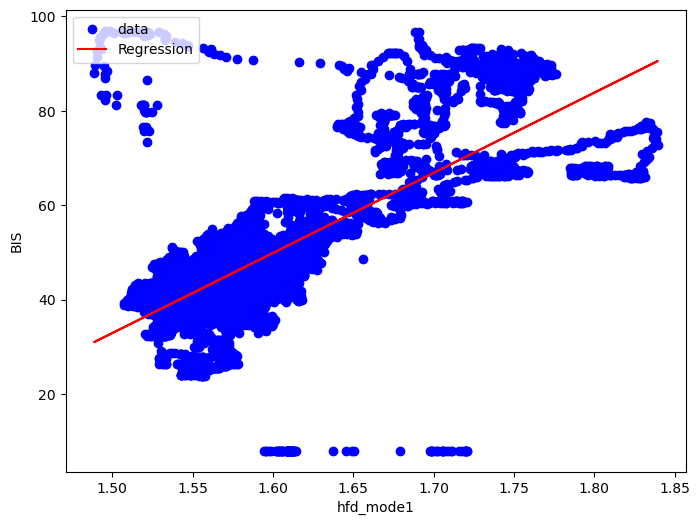

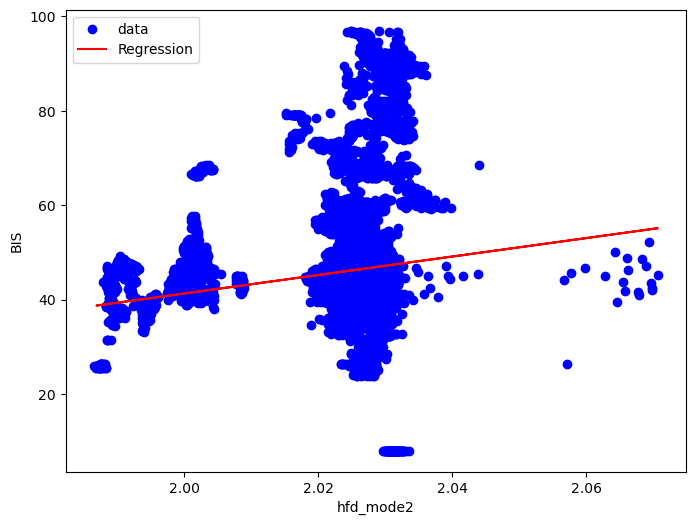

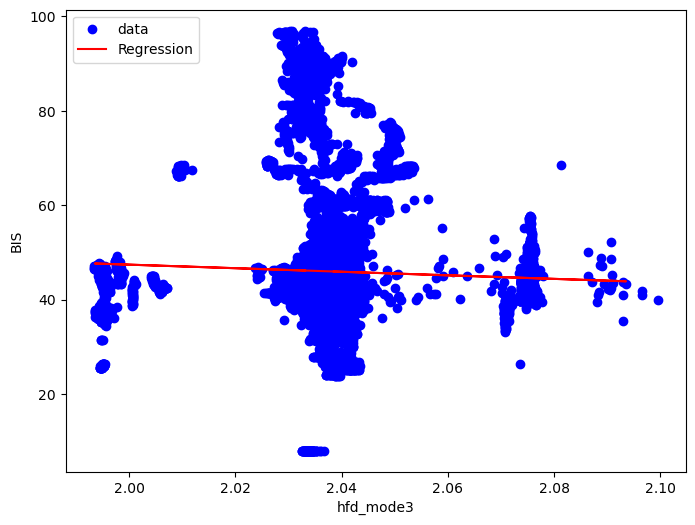

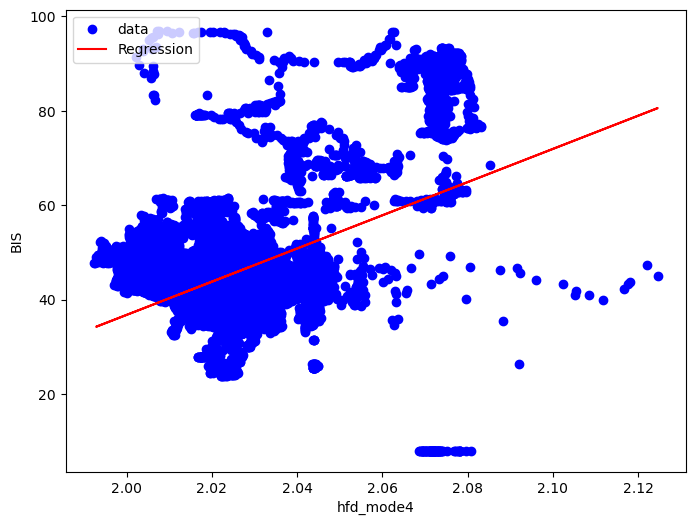

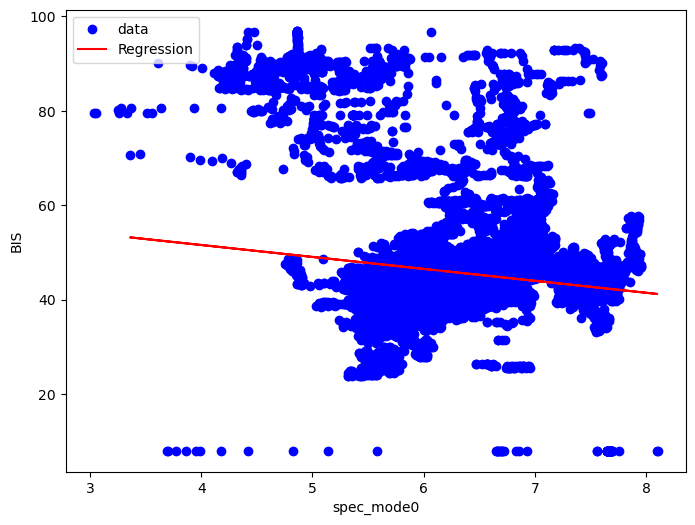

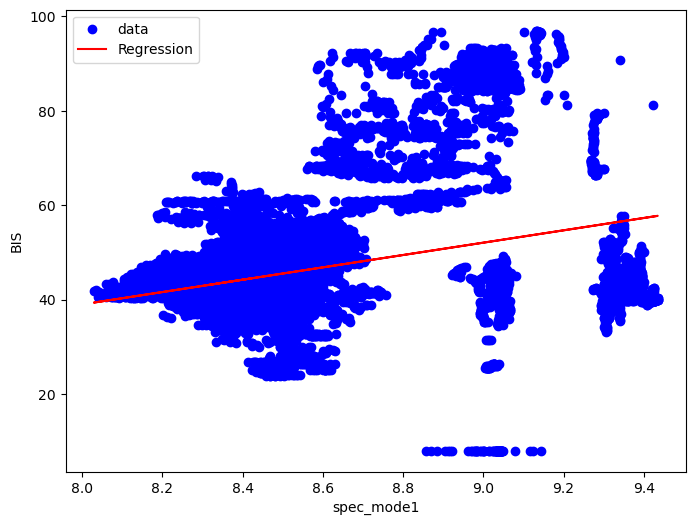

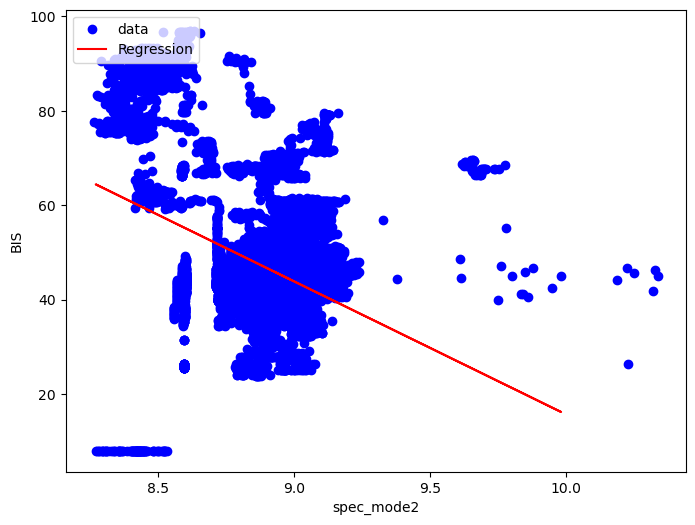

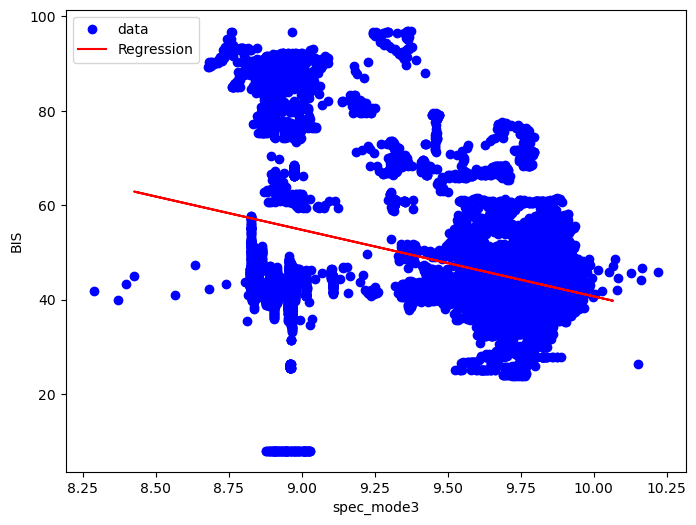

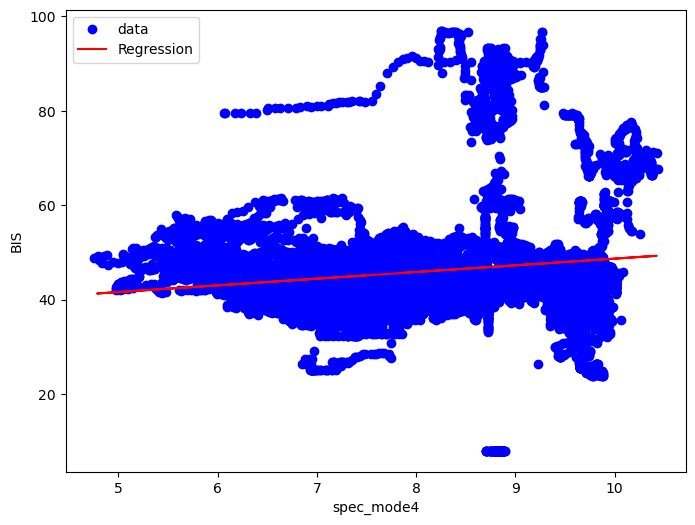

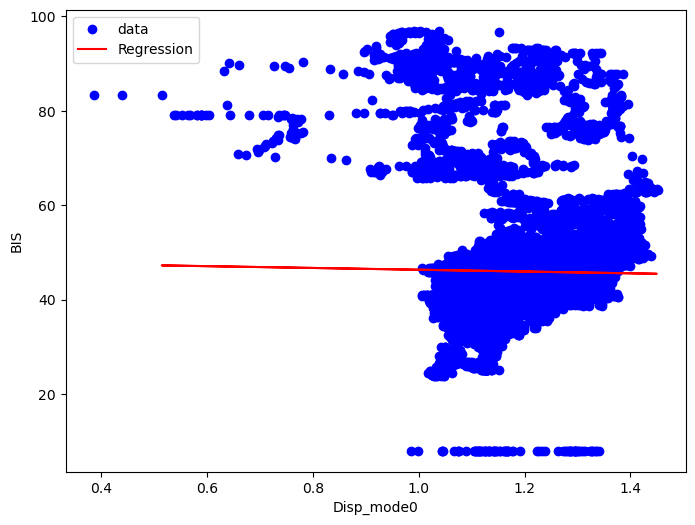

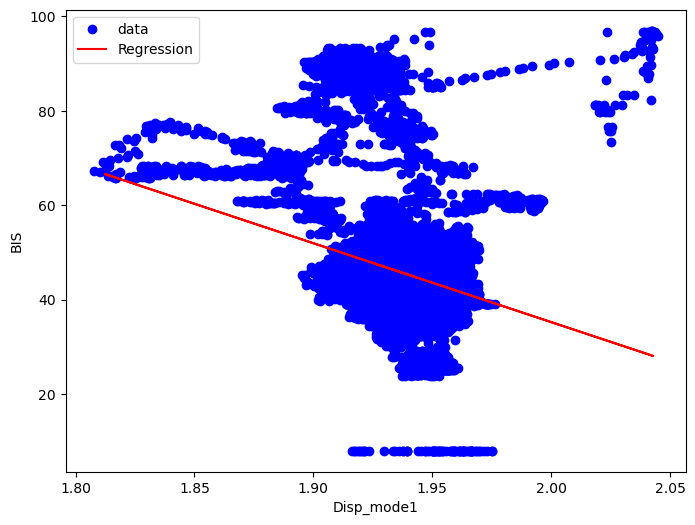

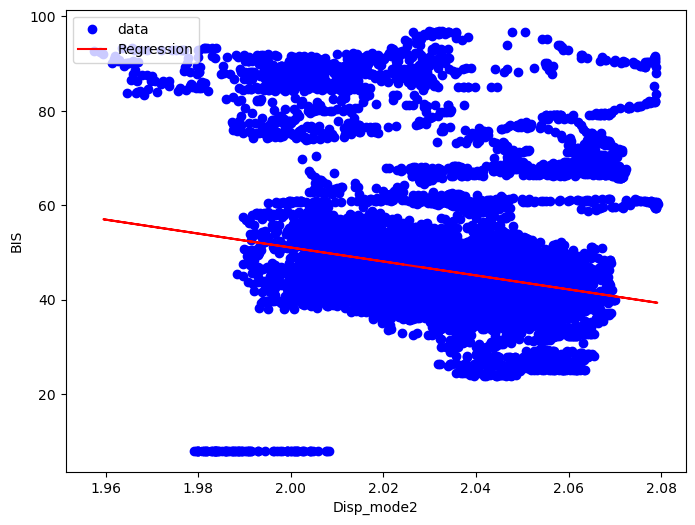

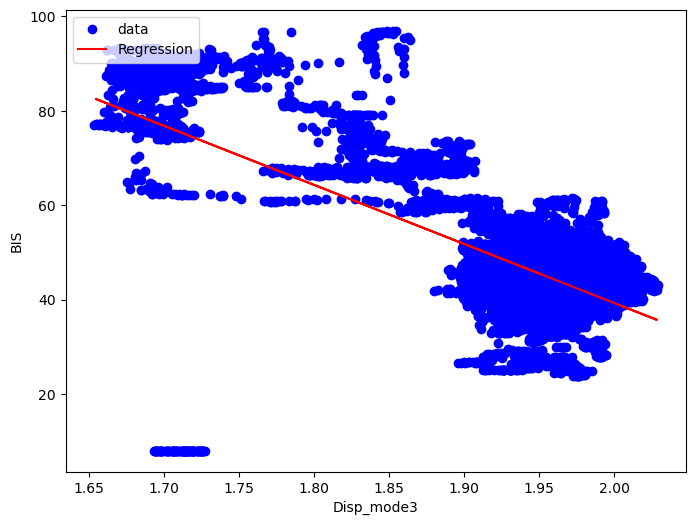

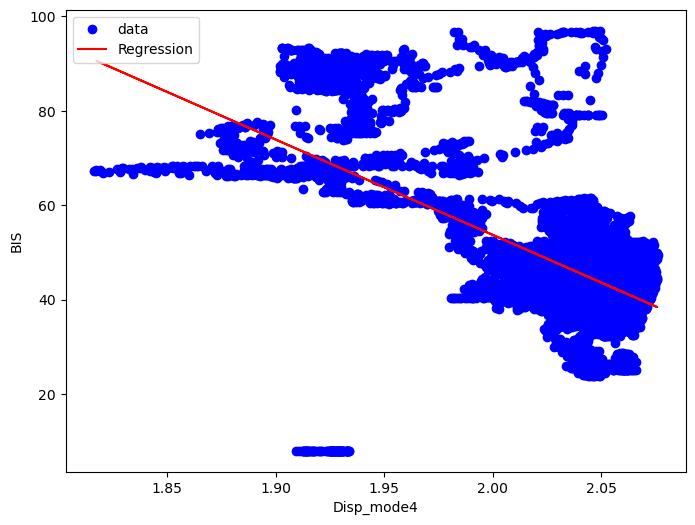

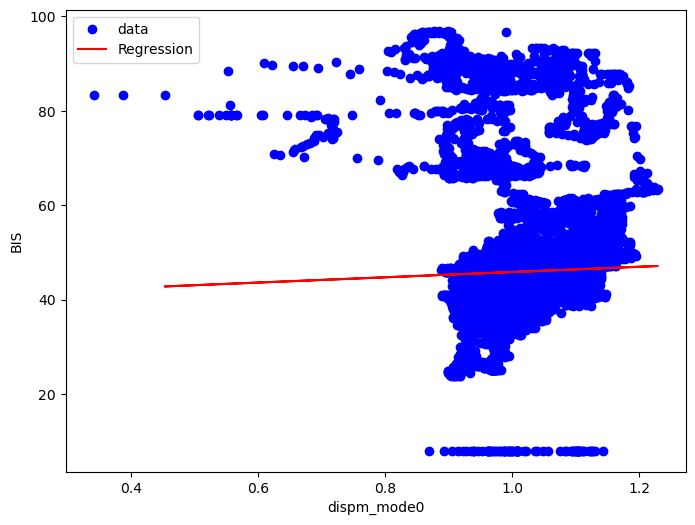

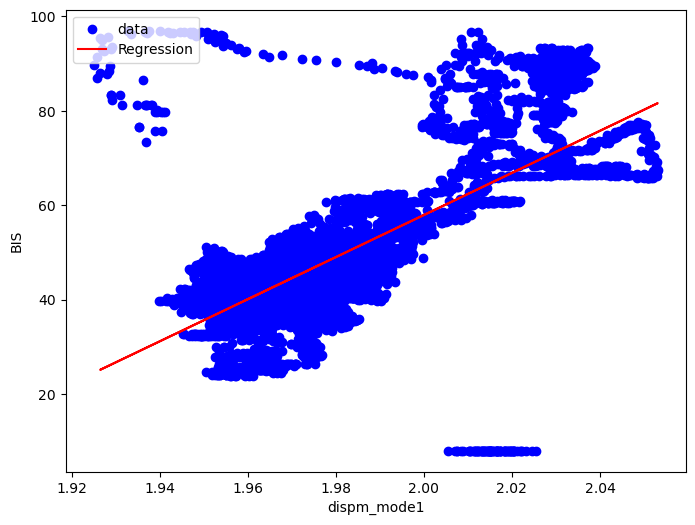

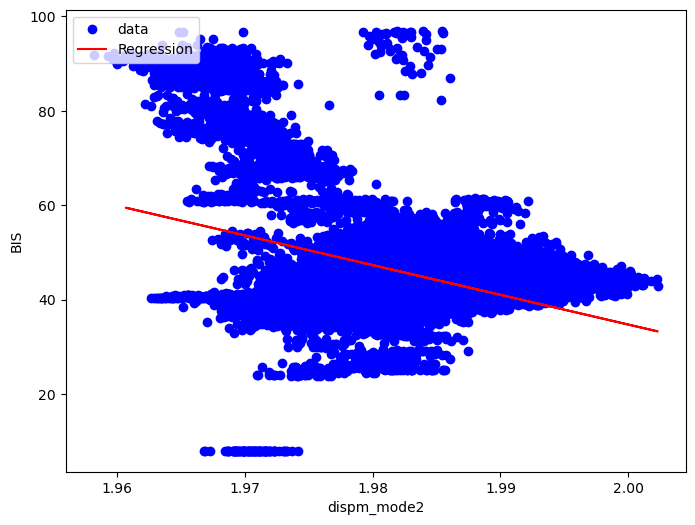

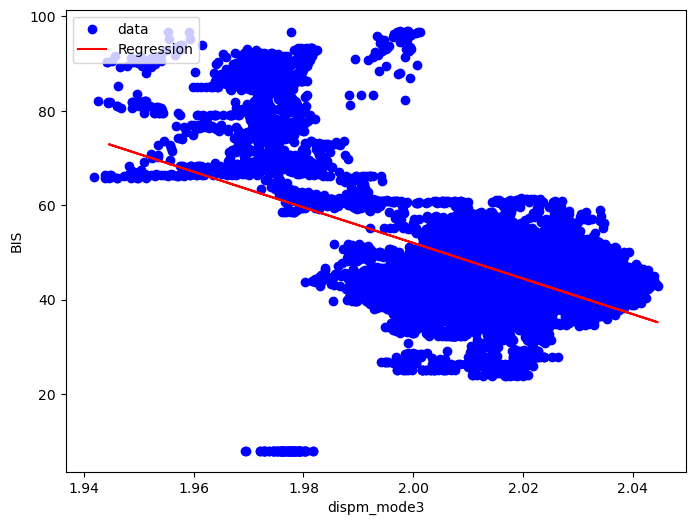

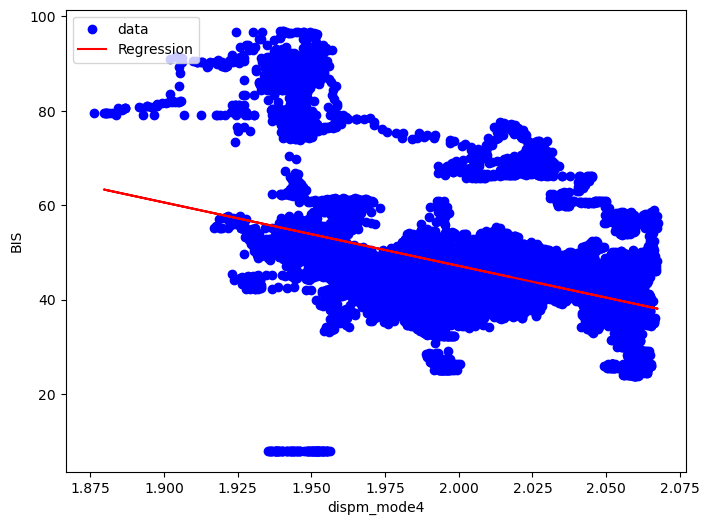

In [6]:

for column in patient_147.columns:
    if column == "BIS":
        continue
        
    plot_regression(patient_147, column)
    


In [7]:
# Metrics
total=pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})

In [8]:
sort_total=total.sort_values('Values', ascending=False)
sort_total

,Metrics,Values
26,pet_mode1_r2,62.177713
21,Perment_mode1_r2,62.030354
41,hfd_mode1_r2,59.844511
20,Perment_mode0_r2,55.277752
56,dispm_mode1_r2,55.120663
25,pet_mode0_r2,54.833049
53,Disp_mode3_r2,54.092445
40,hfd_mode0_r2,52.193432
32,lzc_mode2_r2,49.641639
54,Disp_mode4_r2,43.985397


### Radom forest feature selection

In [9]:


# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Select the top k features (e.g., top 10 features)
k = 10
selected_features = feature_importances_df.head(k)['feature'].tolist()

# Use only the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


          feature  importance
41      hfd_mode1    0.393211
32      lzc_mode2    0.272824
5        hc_mode0    0.043211
51     Disp_mode1    0.033547
15     detf_mode0    0.032502
40      hfd_mode0    0.017544
31      lzc_mode1    0.016664
30      lzc_mode0    0.013759
55    dispm_mode0    0.012587
39      svd_mode4    0.011662
59    dispm_mode4    0.010620
57    dispm_mode2    0.009691
56    dispm_mode1    0.009198
45     spec_mode0    0.008454
37      svd_mode2    0.008359
21  Perment_mode1    0.007314
50     Disp_mode0    0.007067
42      hfd_mode2    0.006078
6        hc_mode1    0.005048
47     spec_mode2    0.004962
54     Disp_mode4    0.003843
24  Perment_mode4    0.003439
4        hm_mode4    0.003367
26      pet_mode1    0.003337
58    dispm_mode3    0.003108
1        hm_mode1    0.003001
25      pet_mode0    0.002994
53     Disp_mode3    0.002888
22  Perment_mode2    0.002823
7        hc_mode2    0.002715
29      pet_mode4    0.002709
49     spec_mode4    0.002591
52     Dis